A man walks his dog along the beach, and throws a ball into the water 10 units along the beach, and 3 units from the shore.
The dog is 3x faster on land than it is in the water.
If dog's goal is to minimize the time taken to get the ball, how far should it run on land before jumping into the water to swim?


Let $d$ be the distance it runs along the shore.

Let $(x,y)$ be the position of the ball and $(0, 0)$ be the initial position of the dog.

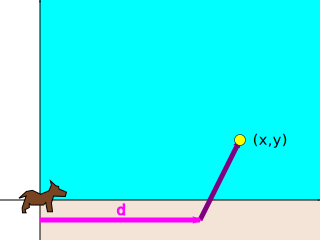

In [1]:
from IPython.display import SVG
SVG(open('./beach.svg').read())

We need an expression for cost, dependent on how far the dog walks on land d.

The diagonal line in the water is the hypotenuse of a triangle with leg lengths $x-d$ and $y$, so it's $\sqrt{(x-d)^2 + y^2}$ long.

Let the land cost be considered $1$ and the water cost be $c$ times as costly. Then the land cost is $d$, the water cost is $c$ times the length of the hypotenuse and we arrive at:

$$
cost(d) = d + c\sqrt{(x-d)^2 + y^2}
$$

We can now graph this cost depending on d, c, and the location of the ball x, y:

In [9]:
from ipywidgets import interact

import math
import matplotlib.pyplot as plt

import numpy as np

def cost(d, c, x, y):
    return 1*d + c*math.sqrt((x-d)**2 + y**2)

def cost2(d, c, x, y):
    return d/c + math.sqrt((x-d)**2 + y**2)

@interact(c=3, x=10, y=3)
def f(c, x, y):
    preimage = np.linspace(0, 20)
    image = [cost(d, c, x, y) for d in preimage]
    image2 = [cost2(d, c, x, y) for d in preimage]
    plt.xlabel("d (land distance)")
    plt.ylabel("cost(d)")
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.plot(preimage, image, label=f'$d + {c}*'+'\sqrt{'+f'({x}-d)^2 + {y**2}'+'}$')
    plt.plot(preimage, image2, label=f'$d/{c} + '+'\sqrt{'+f'({x}-d)^2 + {y**2}'+'}$')
    plt.legend(loc='upper right')

interactive(children=(IntSlider(value=3, description='c', max=9, min=-3), IntSlider(value=10, description='x',…

There's a beautiful spot around $d=9$ where the cost is minimized for the default values $(c, x, y) = (3, 10, 3)$. And it shouldn't seem crazy that the dog spends roughly 90% of its time on land before hopping into the water for the final 10%.

But how do you find exactly where this occurs? By finding the derivative and solving for where it equals zero.

TODO: differentiate this slowly.

$$
cost'(d) = 1 - \frac{c(x-d)}{\sqrt{(x-d)^2 + y^2}}
$$

Solving this for $d$ when $cost'(d) = 0$ is tough, but we can collect terms with $d^2, d^1, 1$ and get a quadratic:

Starting with:

$$
1 - \frac{c(x-d)}{\sqrt{(x-d)^2 + y^2}} = 0
$$

Subtract 1, multiply by -1:

$$
\frac{c(x-d)}{\sqrt{(x-d)^2 + y^2}} = 1
$$

Multiply by the radical, then square both sides:

$$
x^2 - 2xd + d^2 + y^2 = c^2x^2 - 2c^2dx + c^2d^2
$$

Group terms on $d^2$, $d^1$, and $d^0$:

$$
(1-c^2)d^2 + (2c^2x - 2x)d + (x^2 +y^2-c^2x^2) = 0
$$

And that's our quadratic $Ax^2 + Bx + C$ with:

$$
A=1-c^2
$$

$$
B=2c^2x - 2x
$$

$$
C=x^2 +y^2-c^2x^2
$$

So to solve where it's zero, we just solve the quadratic:

In [3]:
import numpy as np

@interact(c=3, x=10, y=3)
def f(c, x, y):
    A = 1 - c*c
    B = 2*c*c*x - 2*x
    C = x*x + y*y - c*c*x*x
    plt.xlabel("d")
    plt.ylabel("cost'(d)")
    preimage = np.linspace(7.5, 12.5)
    image = [A*x*x + B*x + C for x in preimage]
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.plot(preimage, image, label=f'${A}x^2 + {B}x + {C}$')
    plt.legend(loc='upper right')

interactive(children=(IntSlider(value=3, description='c', max=9, min=-3), IntSlider(value=10, description='x',…

In [4]:
import numpy as np

def solve_quadratic(a, b, c):
    discr = b**2 - 4*a*c
    print(discr)
    return (-b + math.sqrt(discr))/(2*a), (-b - math.sqrt(discr))/(2*a)

@interact(c=3, x=10, y=3)
def f(c, x, y):
    c0 = 1 - c*c
    c1 = 2*c*c*x - 2*x
    c2 = x*x + y*y - c*c*x*x
    return solve_quadratic(c0, c1, c2)

interactive(children=(IntSlider(value=3, description='c', max=9, min=-3), IntSlider(value=10, description='x',…

And $d = 8.94$ is the actual optimal length for dog to run on land before swimming.

An interesting result is that after a solution is found, varying the problem's $x$ (the horizontal distance) by, say, $dx$ varies the solution $d$ also by $dx$.